In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the dataset from a CSV file
dataset = pd.read_csv('Iris dataset_Algo.csv')

# Extract features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Calculate the minimum and maximum values for each feature
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)

# Print the minimum and maximum values for each feature
print(f"Minimum value: {min_values}")
print(f"Maximum value: {max_values}")

Minimum value: [4.3 2.  1.  0.1]
Maximum value: [7.9 4.4 6.9 2.5]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.25
                                                    , random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1)
                      , y_test.reshape(len(y_test),1))
                      ,1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


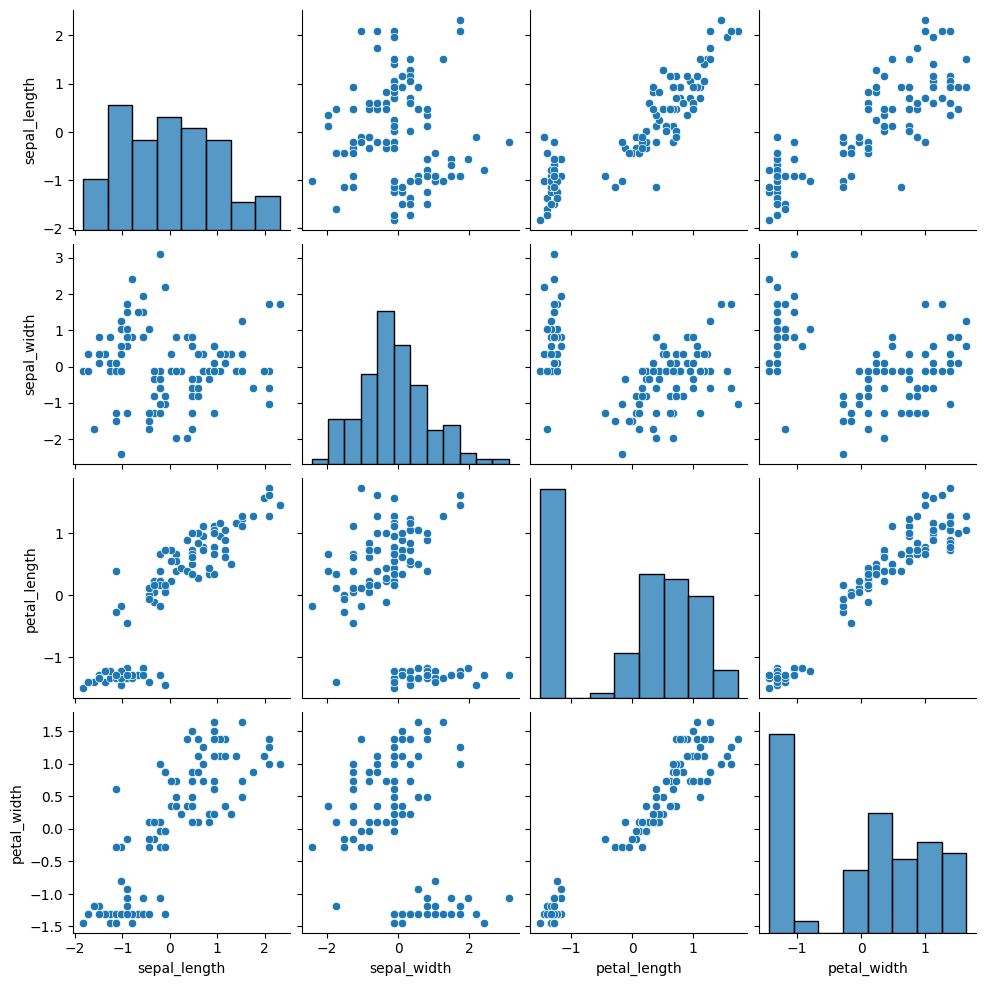

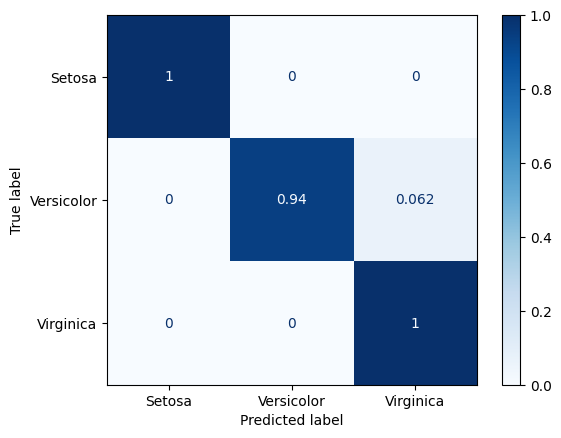

In [7]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Define a mapping for iris species for better display
iris_species_mapping = {
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica'
}

# Get unique iris species after applying the mapping
iris_species = dataset['iris_species'].map(iris_species_mapping).unique()

# Create a pair plot for data visualization
sns.pairplot(data=pd.DataFrame(X_train, columns = dataset.iloc[:, :-1].columns.tolist()))

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=iris_species,
    cmap=plt.cm.Blues,
    normalize='true',
)
plt.show()

In [8]:
# User Input
# Validate sepal length
while True:
    sepal_length_input = float(input(f"Enter sepal length ({min_values[0]} - {max_values[0]}): "))
    if min_values[0] <= sepal_length_input <= max_values[0]:
        print("Sepal length input is valid.")
        break
    else:
        print("Invalid input. Please enter a value within the specified range.")

# Validate sepal width
while True:
    sepal_width_input = float(input(f"Enter sepal width ({min_values[1]} - {max_values[1]}): "))
    if min_values[1] <= sepal_width_input <= max_values[1]:
        print("Sepal width input is valid.")
        break
    else:
        print("Invalid input. Please enter a value within the specified range.")

# Validate petal length
while True:
    petal_length_input = float(input(f"Enter petal length ({min_values[2]} - {max_values[2]}): "))
    if min_values[2] <= petal_length_input <= max_values[2]:
        print("Petal length input is valid.")
        break
    else:
        print("Invalid input. Please enter a value within the specified range.")

# Validate petal width
while True:
    petal_width_input = float(input(f"Enter petal width ({min_values[3]} - {max_values[3]}): "))
    if min_values[3] <= petal_width_input <= max_values[3]:
        print("Petal width input is valid.")
        break
    else:
        print("Invalid input. Please enter a value within the specified range.")

Sepal length input is valid.
Sepal width input is valid.
Petal length input is valid.
Petal width input is valid.


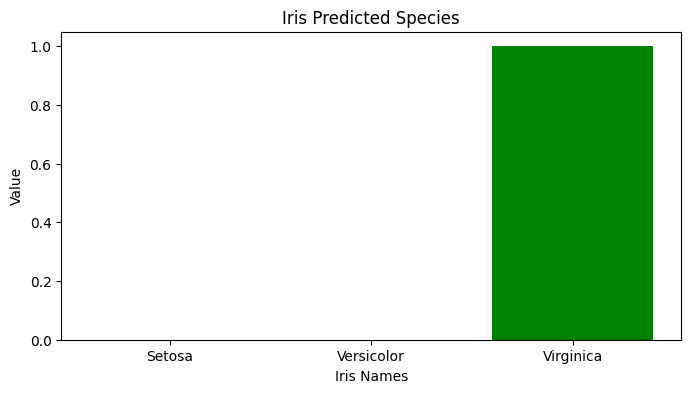

The predicted iris species is: Virginica
Accuracy of the model:97.37%
Probability of being Setosa: 0.00%
Probability of being Versicolor: 0.80%
Probability of being Virginica: 99.20%


In [9]:
from sklearn.metrics import accuracy_score

# Preprocess user input
user_input = np.array([[sepal_length_input, sepal_width_input, petal_length_input, petal_width_input]])
user_input = sc.transform(user_input)  # Apply the same scaling as used during training

# Predict the iris species and probabilities for each class
predicted_species = classifier.predict(user_input)
predicted_species_probabilities = classifier.predict_proba(user_input)

# Create a vector representation of the predicted species
predicted_vector = np.zeros(len(iris_species))
predicted_vector[np.where(dataset['iris_species'].unique() == predicted_species[0])] = 1

# Create a bar chart to visualize the prediction
plt.figure(figsize=(8, 4))
plt.bar(iris_species, predicted_vector, color=['green' if val else 'red' for val in predicted_vector])
plt.xlabel('Iris Names')
plt.ylabel('Value')
plt.title('Iris Predicted Species')
plt.show()

# Print the predicted iris species
print(f"The predicted iris species is: {iris_species_mapping.get(predicted_species[0])}")

# Calculate and print the accuracy of the model
print(f"Accuracy of the model:{(accuracy_score(y_test, classifier.predict(X_test)) * 100):.2f}%")

# Print the probabilities for each class
for class_name, probability in zip(iris_species, predicted_species_probabilities[0]):
    print(f"Probability of being {class_name}: {(probability * 100):.2f}%")

Questions:

1. How accurate is each model?

    At test_size 0.25, the accuracy of each model is 97.37%. 

2. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer

    Yes because the dataset is quite small (n = 150) and only involves simple predictions and classifications, hence there is no need for much more complex models. 

3. What are your recommendations for improving the classification of this data set? Explain

    Given the data set, an alternative classification model can be used to classify the data. Based on our own research, the Naive Bayes model can be used here because the data set is small (n = 150) and we are only making simple predictions and classifications. 

4. Create a graphical model of how the selection of logisitc regression works

                                                                Logistic Regression Graph

![alt text](image2.png "image2")

Logistic regression by default, is typically used to classify data as true or false (1 or 0). I.e. good or bad food, true or false, 1 or 0. 

Y-Axis: Probability 
X-Axis: Input variable

Example
To classify things as true or false, a threshold value is set. This value is usually set at 0.5, but is modified according to different data sets.

![alt text](image1.png "image1")

In this example, we have an input variable of 2.5. When plotted, we can see that it falls at 0.75 probability or 75%.

If our Threshold Value = 0.5:

Then our input variable of 2.5 will be classified as 1 or true. 

If our input variable is plotted and falls below the threshold, then it will be classified as 0 or false.
